# Финальный проект: Анализ оттока клиентов банка "Метанпром".

Ссылка на презентацию: https://disk.yandex.ru/i/xd3qNrnOymOfwA

Ссылка на дашборд: https://public.tableau.com/app/profile/artur1081/viz/Final_dashboard_16781478516230/Dashboard1

## Описание проекта:
Главной задачей стал анализ оттока клиентов. Анализ показал, как клиенты пользуются  услугами, а так же помог составить портрет клиентов, которые склонны уходить из банка.

## Цель проекта: 
На основании портрета клиентов выяснить, какая категория более подвержена оттоку из банка "Метанпром". Оставить рекомендации для уменьшения доли оттока.

## Предобработка данных:

Для начала импортируем библиотеки:

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import math as mth

Загрузка датасета:

In [2]:
data = pd.read_csv('/datasets/bank_dataset.csv') 

In [3]:
data.head()

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


Узнаем общую информацию о датасете:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [5]:
data.describe()

,userid,score,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,6383.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.573368e+07,650.528800,38.921800,5.012800,119827.493793,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,30095.056462,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.560844e+07,350.000000,18.000000,0.000000,3768.690000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.567126e+07,584.000000,32.000000,3.000000,100181.975000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.573347e+07,652.000000,37.000000,5.000000,119839.690000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.579597e+07,718.000000,44.000000,7.000000,139512.290000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.585843e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Посчитаем количество явных дубликатов:

In [6]:
print('Количество явных дубликатов в датасете:', data.duplicated().sum())

Количество явных дубликатов в датасете: 0


Узнаем количество пропусков:

In [7]:
data.isna().sum()

userid                 0
score                  0
City                   0
Gender                 0
Age                    0
Objects                0
Balance             3617
Products               0
CreditCard             0
Loyalty                0
estimated_salary       0
Churn                  0
dtype: int64

Столбец balance содержит 3617 пропусков.

Посчитаем долю пропусков в столбце balance:

In [8]:
data.isna().mean()

userid              0.0000
score               0.0000
City                0.0000
Gender              0.0000
Age                 0.0000
Objects             0.0000
Balance             0.3617
Products            0.0000
CreditCard          0.0000
Loyalty             0.0000
estimated_salary    0.0000
Churn               0.0000
dtype: float64

Пропуски в столбце balance содержат существенную часть данных и удалению не подлежат.

Приведем названия столбцов к змеиному регистру:

In [9]:
data.columns = data.columns.str.lower()
data.head()

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


Исследуем выбросы в столбцах собственности, возраста, баланса и предполагаемой зарплаты:

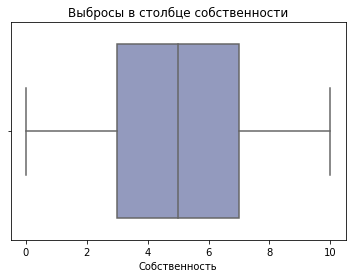

In [10]:
sns.boxplot(data=data, x='objects', palette='BuPu')
plt.title('Выбросы в столбце собственности')
plt.xlabel('Собственность')
plt.show()

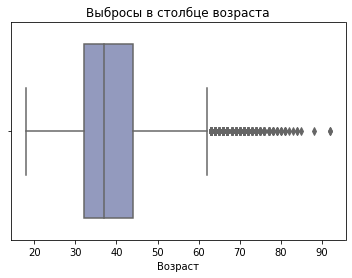

In [11]:
sns.boxplot(data=data, x='age', palette='BuPu')
plt.title('Выбросы в столбце возраста')
plt.xlabel('Возраст')
plt.show()

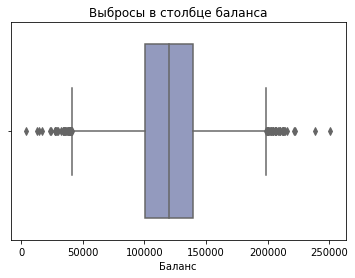

In [12]:
sns.boxplot(data=data, x='balance', palette='BuPu')
plt.title('Выбросы в столбце баланса')
plt.xlabel('Баланс')
plt.show()

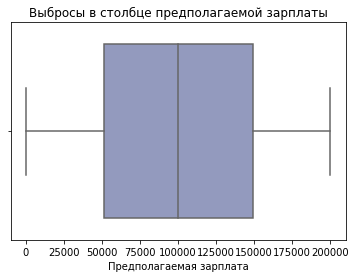

In [13]:
sns.boxplot(data=data, x='estimated_salary', palette='BuPu')
plt.title('Выбросы в столбце предполагаемой зарплаты')
plt.xlabel('Предполагаемая зарплата')
plt.show()

Столбец возраста содержит выбросы на отрезке после 62 лет. Столбец баланса содержит выбросы в районе больше 200000 и меньше 40000.

Проверим каков процент выбросов в столбце возраста:

In [14]:
print('Процент выбросов в столбце возраста:', round(len(data.query('age > 62'))/len(data)*100, 1), '%') 

Процент выбросов в столбце возраста: 3.6 %


Проверим каков процент выбросов в столбце баланса:

In [15]:
print('Процент выбросов в столбце баланса:', round(len(data.query('balance > 200000 or balance < 40000'))/len(data)*100, 1), '%')

Процент выбросов в столбце баланса: 0.6 %


Выбросы подлежат удалению, так как их общая доля не превышает 5%.

Создадим новый отфильтрованный датасет.

In [16]:
data = data.query('balance < 200000 and balance > 40000 and age <= 62')
data.describe()

,userid,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
count,6.098000e+03,6098.000000,6098.000000,6098.000000,6098.000000,6098.000000,6098.000000,6098.000000,6098.000000,6098.000000
mean,1.573324e+07,650.947852,38.110528,4.982781,119740.764234,1.388488,0.700558,0.503608,100664.253947,0.237783
std,7.190547e+04,96.929753,8.895006,2.908286,28876.878459,0.578817,0.458051,0.500028,57418.551848,0.425760
min,1.560844e+07,350.000000,18.000000,0.000000,40105.510000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1.567104e+07,584.000000,32.000000,2.000000,100370.117500,1.000000,0.000000,0.000000,51697.330000,0.000000
50%,1.573287e+07,652.000000,37.000000,5.000000,119785.240000,1.000000,1.000000,1.000000,101140.290000,0.000000
75%,1.579561e+07,718.000000,43.000000,8.000000,139217.690000,2.000000,1.000000,1.000000,149592.187500,0.000000
max,1.585843e+07,850.000000,62.000000,10.000000,199689.490000,4.000000,1.000000,1.000000,199970.740000,1.000000


По итогам предобработки были выявлены пропуски в данных, названия столбцов приведены к общему стилю. Так же были отброшены выбросы. Был создан отфильтрованный датасет на основе предобработки данных.

## Исследовательский анализ:

Закодируем категориальные значения в gender и city для корректного отображения на матрице корреляции и создадим новые столбцы с кодировкой:

In [17]:
data['gender_number'] = data['gender'].replace(['Ж', "М"], [0, 1])
data.head()

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,gender_number
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0,0
5,15616748,645,Рыбинск,М,44,8,113755.78,2,1,0,149756.71,1,1
7,15698884,376,Ростов Великий,Ж,29,4,115046.74,4,1,0,119346.88,1,0


In [18]:
data['city_number']=data['city']

In [19]:
data = pd.get_dummies(data, columns=['city_number'])
data = data.rename (
    columns = ({
        'city_number_Ростов Великий':'Ростов Великий', 'city_number_Рыбинск':'Рыбинск','city_number_Ярославль':'Ярославль', })
)
data.head()

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,gender_number,Ростов Великий,Рыбинск,Ярославль
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,0,0,1,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,0,0,0,1
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0,0,0,1,0
5,15616748,645,Рыбинск,М,44,8,113755.78,2,1,0,149756.71,1,1,0,1,0
7,15698884,376,Ростов Великий,Ж,29,4,115046.74,4,1,0,119346.88,1,0,1,0,0


Построим матрицу корреляции:

In [20]:
plt.rcParams ['figure.figsize'] = [12, 8] # увеличили графики во всем проекте.

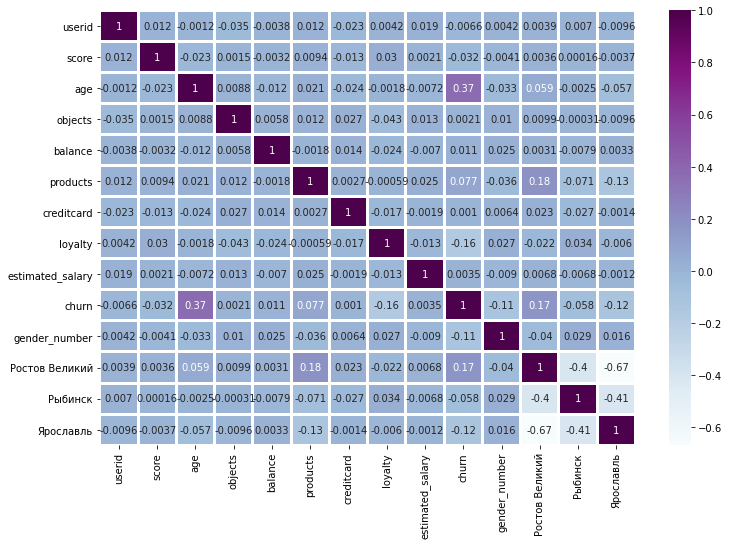

In [21]:
sns.heatmap (data.corr(), annot=True, cmap='BuPu', linewidths=2);

При рассмотрении корреляции параметра churn с остальными параметрами, можно заметить что сильной зависимости между ними не наблюдается. Наиболее выражена зависимость с параметром возраста, однакоона составляет лишь 37%. С точки зрения шкалы Чеддока - данные имеют либо очень слабые силы связи с коэффициентом корреляции от 0 до 0.3, либо слабые силы связи с коэффициентом корреляцииот 0.3 до 0.5. В очень слабую связь с churn входят такие параметры как:  score (баллы кредитного скоринга), balance (баланс на счете), products (количество продуктов), creditcard (наличие кредитной карты), loyality (активность клиента). В слабую связь входит только параметр age (возраст).

Для определения возрастных категорий, рассмотрим отточных клиентов в зависимости от возраста:

<AxesSubplot:xlabel='age'>

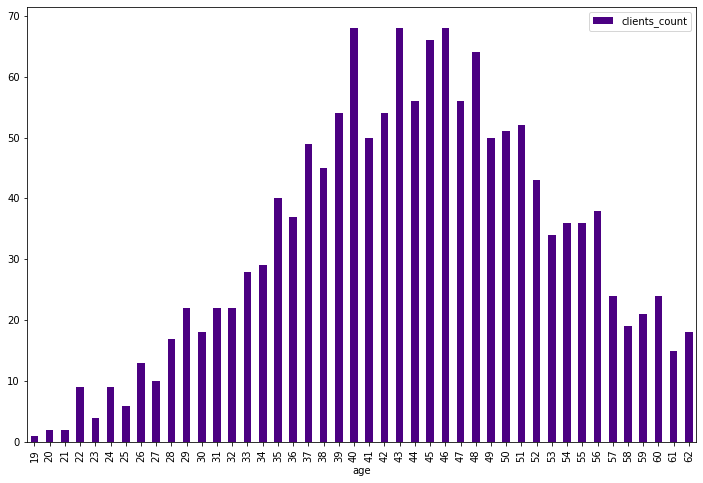

In [22]:
data_age = data[data['churn']==1]['age'].value_counts().reset_index().rename(columns={'index':'age', 'age':'clients_count'}).sort_values(by='age')
data_age.plot(kind='bar', x='age', y='clients_count', color='indigo')

Напишем функцию с выделением основных возрастных категорий:

In [23]:
def age_group(age):
    if 27 > age >= 18:
        return '18-27'
    if 36 >= age >= 28:
        return '28-36'
    if 48 >= age >= 37:
        return '37-48'
    if 62 >= age >= 49:
        return '49-62'

Применим функцию к столбцу age и создадим новый столбец для возрастных категорий:

In [24]:
data['age_group'] = data['age'].apply(age_group)
data.head()

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,gender_number,Ростов Великий,Рыбинск,Ярославль,age_group
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,0,0,1,0,37-48
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,0,0,0,1,37-48
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0,0,0,1,0,37-48
5,15616748,645,Рыбинск,М,44,8,113755.78,2,1,0,149756.71,1,1,0,1,0,37-48
7,15698884,376,Ростов Великий,Ж,29,4,115046.74,4,1,0,119346.88,1,0,1,0,0,28-36


Рассмотрим долю ушедших клиентов от общего числа для таких параметров как:

-кредитный рейтинг

-город клиента

-пол пользователя 

-объекты в собственности

-возрастная группа пользователя

-количество продуктов, которыми пользуется клиент 

-наличие кредитной карты 

-активность клиента

,sum,count,percent
score,,,
351,1,1,100.000000
358,1,1,100.000000
359,1,1,100.000000
363,1,1,100.000000
365,1,1,100.000000
...,...,...,...
839,1,2,50.000000
840,1,3,33.333333
841,1,5,20.000000


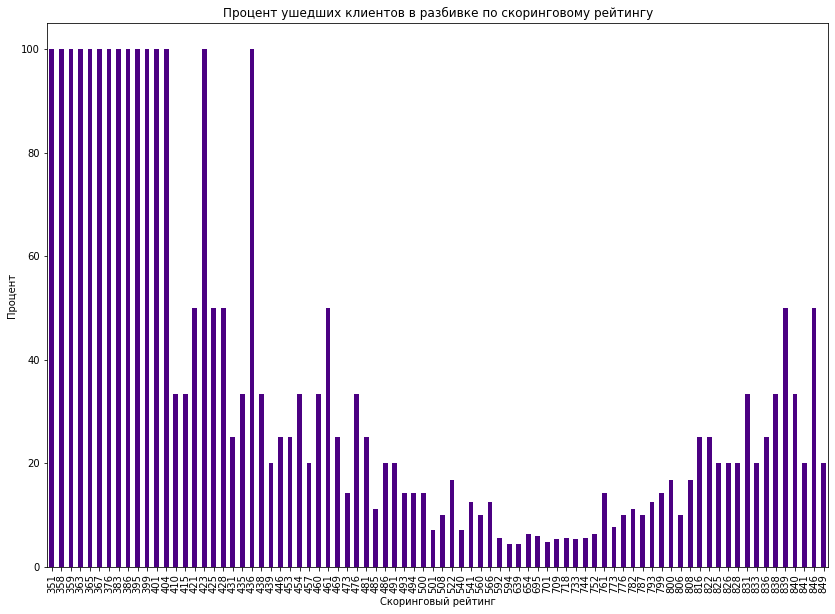

In [25]:
churn_score = data.pivot_table(index='score', values='churn', aggfunc=['sum', 'count'])
churn_score.columns = churn_score.columns.droplevel(level=1)
churn_score['percent'] = churn_score['sum']/churn_score['count']*100
churn_score = churn_score[churn_score['sum']==1]
churn_score['percent'].plot(kind ='bar', title ='Процент ушедших клиентов в разбивке по скоринговому рейтингу', figsize=(14,10),
                            xlabel='Скоринговый рейтинг', ylabel='Процент', color='indigo')
churn_score

По графику видно, что из банка со 100% вероятностью уходят клиенты с рейтингом ниже 410, а так же рейтингом равным 423 и 436. С рейтинга 438 по рейтинг 639 наблюдается снижение оттока клиентов. С скорингового рейтинга 654 доля ушедших клиентов растет.

,sum,count,percent
city,,,
Ростов Великий,785,2411,32.559104
Рыбинск,227,1209,18.775848
Ярославль,438,2478,17.675545


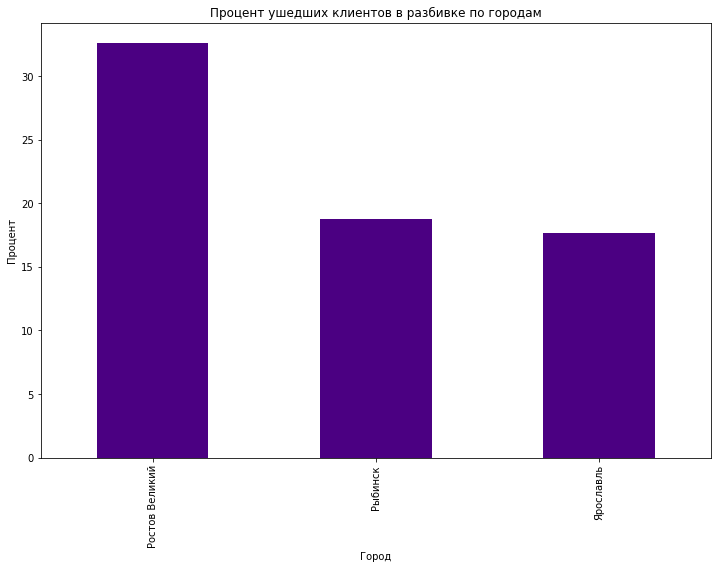

In [26]:
churn_city = data.pivot_table(index='city', values ='churn', aggfunc =['sum', 'count'])
churn_city.columns = churn_city.columns.droplevel(level=1)
churn_city['percent'] = churn_city['sum']/churn_city['count']*100
churn_city['percent'].plot(kind='bar', title='Процент ушедших клиентов в разбивке по городам',
                           xlabel='Город', ylabel='Процент', color='indigo') 
churn_city

Исходя из графика можно заметить, что самый большой процент ушедших клиентов относится к 
Ростову Великому. В рыбинске и Ярославле доли примерно равны.

,sum,count,percent
gender,,,
Ж,799,2759,28.959768
М,651,3339,19.496855


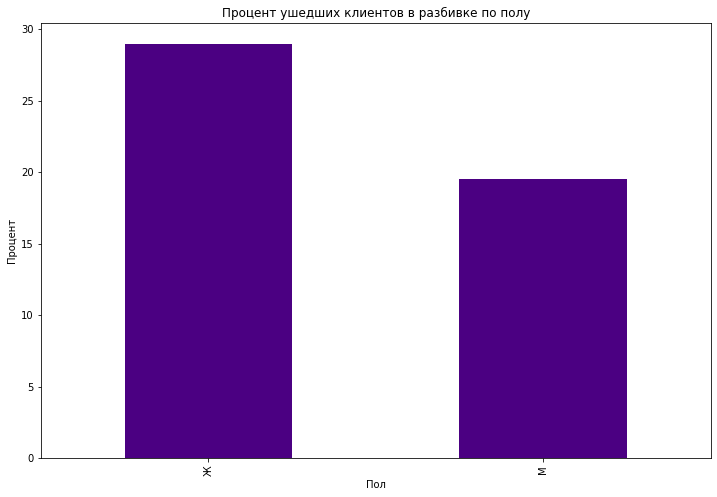

In [27]:
churn_gender = data.pivot_table(index='gender', values='churn', aggfunc=['sum', 'count'])
churn_gender.columns = churn_gender.columns.droplevel(level=1)
churn_gender['percent'] = churn_gender['sum']/churn_gender['count']*100
churn_gender['percent'].plot(kind='bar', title='Процент ушедших клиентов в разбивке по полу', 
                             xlabel='Пол', ylabel='Процент', color='indigo')
churn_gender

Судя по графику женщины покидают банк чаще мужчин.

,sum,count,percent
objects,,,
0,73,265,27.547170
1,160,653,24.502297
2,127,633,20.063191
3,153,626,24.440895
4,142,596,23.825503
5,153,609,25.123153
6,136,567,23.985891
7,124,621,19.967794
8,155,640,24.218750


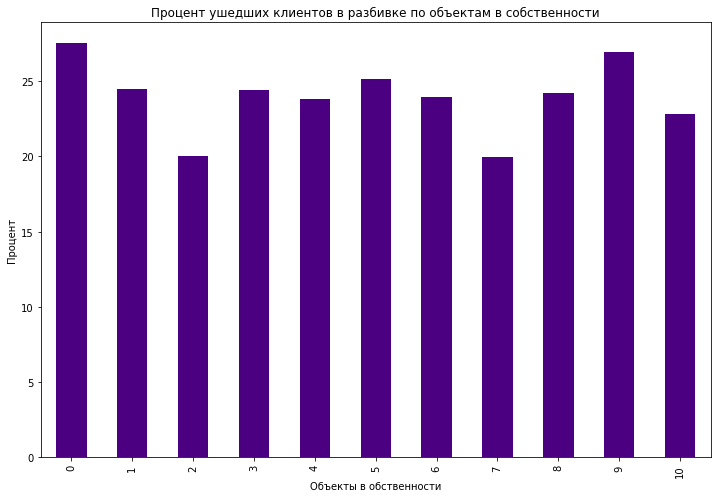

In [28]:
churn_objects = data.pivot_table(index='objects', values='churn', aggfunc=['sum', 'count'])
churn_objects.columns = churn_objects.columns.droplevel(level=1)
churn_objects['percent'] = churn_objects['sum']/churn_objects['count']*100
churn_objects['percent'].plot(kind='bar', title='Процент ушедших клиентов в разбивке по объектам в собственности',
                              xlabel='Объекты в обственности', ylabel='Процент', color='indigo')
churn_objects

Наиболее подвержены уходу клиенты без объектов собственности и с 9 объектами собственности. Наименьшая доля ушедших клиентов с 2 или 7 объектами собственности.

,sum,count,percent
age_group,,,
18-27,46,504,9.126984
28-36,235,2200,10.681818
37-48,698,2464,28.327922
49-62,461,807,57.125155


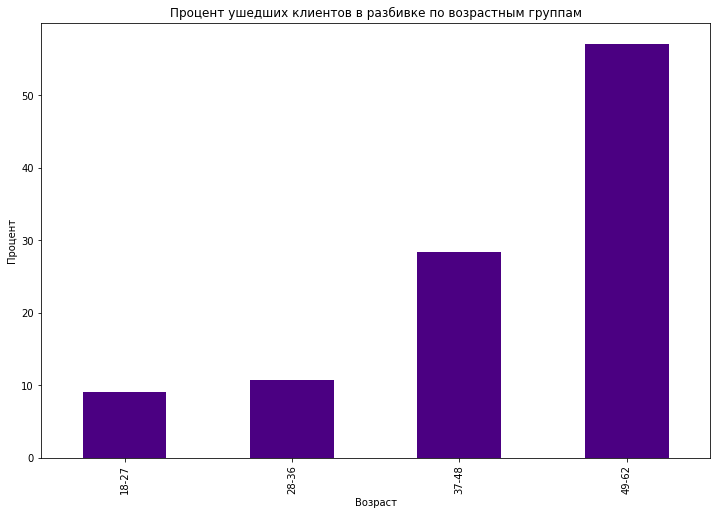

In [29]:
churn_age_group = data.pivot_table (index='age_group', values='churn', aggfunc=['sum', 'count'])
churn_age_group.columns = churn_age_group.columns.droplevel(level=1)
churn_age_group['percent'] = churn_age_group['sum']/churn_age_group['count']*100
churn_age_group['percent'].plot(kind='bar', title='Процент ушедших клиентов в разбивке по возрастным группам',
                                xlabel='Возраст', ylabel='Процент', color='indigo')
churn_age_group

При изучении всех групп возрастов, можно заметить что большая часть клиентов возраста 49-62, более 50%, подвержено оттоку. Наименее подвержены оттоку клиенты в возрастной группе 18-27 лет.

,sum,count,percent
products,,,
1,1012,3980,25.427136
2,243,1913,12.702561
3,149,159,93.710692
4,46,46,100.000000


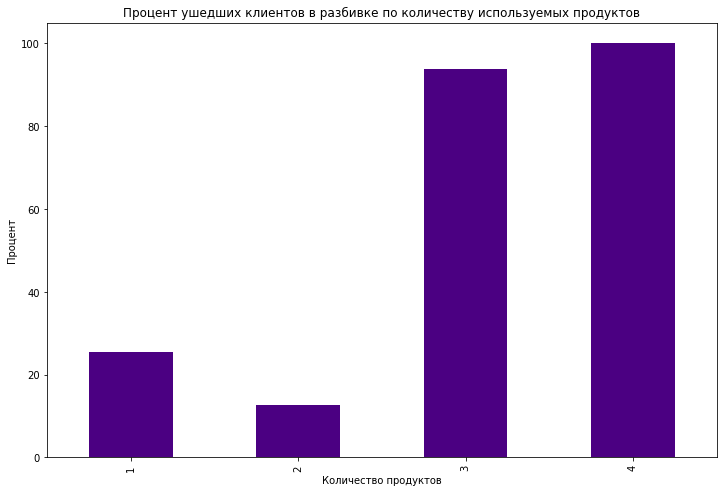

In [30]:
churn_products = data.pivot_table(index='products', values='churn', aggfunc=['sum', 'count'])
churn_products.columns = churn_products.columns.droplevel(level=1)
churn_products['percent'] = churn_products['sum']/churn_products['count']*100
churn_products['percent'].plot(kind='bar', title='Процент ушедших клиентов в разбивке по количеству используемых продуктов',
                               xlabel='Количество продуктов', ylabel='Процент', color='indigo')
churn_products

Рассмотрим, какую долю от всех клиентов занимает то или иное количества продукта:

<AxesSubplot:title={'center':'Процент клиентов от общего числа в разбивке по количеству используемых продуктов'}, xlabel='Количество продуктов', ylabel='Процент'>

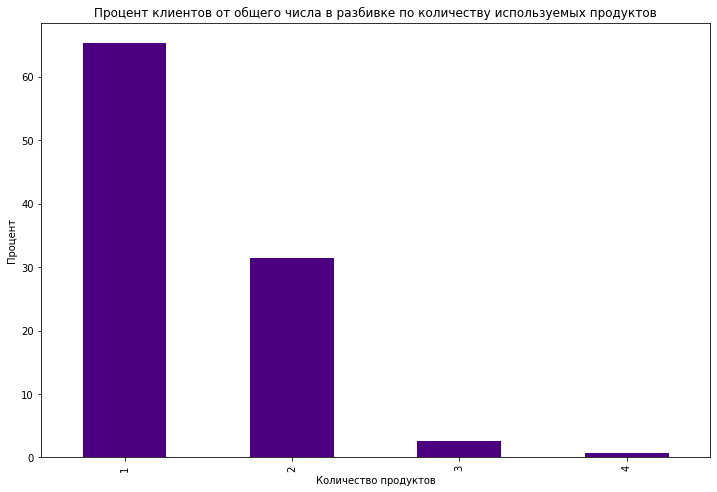

In [31]:
count_products = data.pivot_table(index='products', values='userid', aggfunc='count')
count_total = [6098, 6098, 6098, 6098]
count_products['total_userid'] = count_total
count_products
count_products['percent'] = count_products['userid']/count_products['total_userid']*100
count_products['percent'].plot(kind='bar',
                               title='Процент клиентов от общего числа в разбивке по количеству используемых продуктов',
                               xlabel='Количество продуктов', ylabel='Процент', color='indigo')

На графике видно, что наибольшее количество клиентов пользуются 1 продуктом. Меньше всего клиенты пользуются 4 продуктами.

Наиболее подвержены уходу клиенты с оформленными 3 или 4 продуктами. Клиенты с 1 или 2 продуктами представляют намного меньшую долю ушедших.


,sum,count,percent
creditcard,,,
0,433,1826,23.713034
1,1017,4272,23.806180


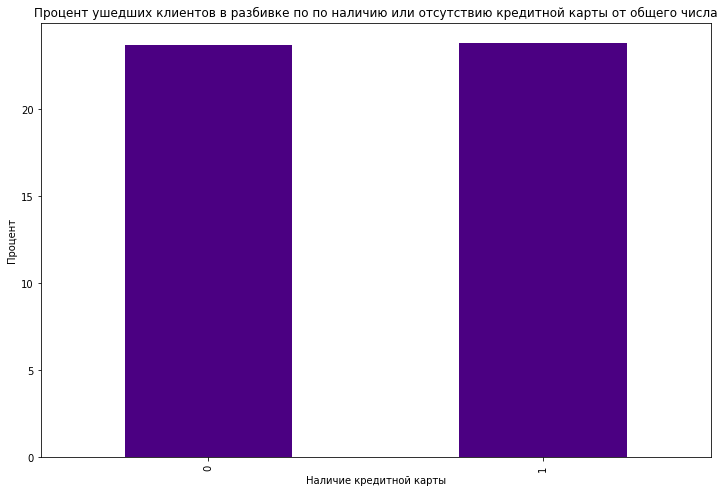

In [32]:
churn_creditcard = data.pivot_table(index='creditcard', values='churn', aggfunc=['sum', 'count'])
churn_creditcard.columns = churn_creditcard.columns.droplevel(level=1)
churn_creditcard['percent'] = churn_creditcard['sum']/churn_creditcard['count']*100
churn_creditcard['percent'].plot(kind='bar', title='Процент ушедших клиентов в разбивке по по наличию или отсутствию кредитной карты от общего числа',
                                  xlabel='Наличие кредитной карты', ylabel='Процент', color='indigo')
churn_creditcard

На графике видно, как наличие кредитной карты не влияет на отток.

,sum,count,percent
loyalty,,,
0,930,3027,30.723489
1,520,3071,16.932595


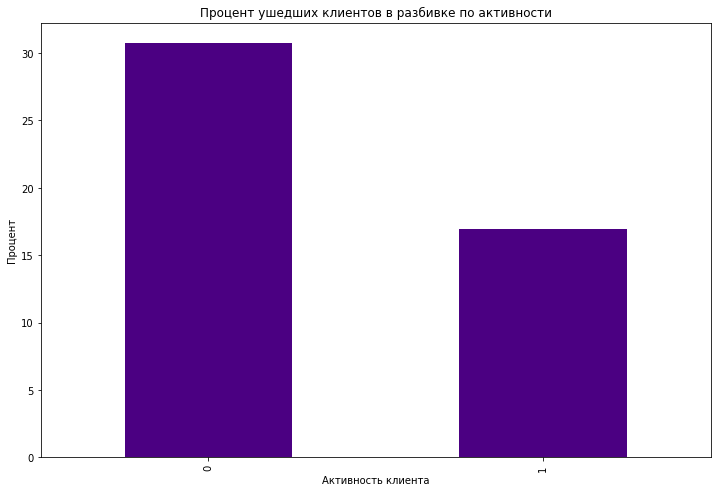

In [33]:
churn_loyalty = data.pivot_table(index='loyalty', values='churn', aggfunc=['sum', 'count'])
churn_loyalty.columns = churn_loyalty.columns.droplevel(level=1)
churn_loyalty['percent'] = churn_loyalty['sum']/churn_loyalty['count']*100
churn_loyalty['percent'].plot(kind='bar', title='Процент ушедших клиентов в разбивке по активности', 
                              xlabel='Активность клиента', ylabel='Процент', color='indigo');
churn_loyalty

Активные клиенты менее подвержены уходу, нежели клиенты утратившие активность.

## Создание портретов пользователей:

Выделим портрет клиентов, которые склонны уходить из банка:

-рейтинг ниже 410, а так же равен 423 и 436

-клиенты из города Ростов Великий

-клиенты женского пола

-клиенты не имеющие объектов собственности, либо имеющие 9 объектов

-клиенты состоящие в возрастной группе 49-62 года

-клиенты пользующиеся 3-4 продуктами банков

-клиенты не проявляющие активности

Так же выделим портрет клиентов, которые склонны остаться:

-скоринговый рейтинг держится в районе 592-752

-клиенты из городов Рыбинск и Ярославль

-клиенты мужского пола

-клиенты владеющие 2 или 7 объектами собственности

-возраст клиентов от 18 до 36 лет

-клиенты пользующиеся 1-2 банковскими продуктами

-клиенты проявляющие активность

## Проверка гипотез:

Проверим три гипотезы: Гипотеза 1: доходы ушедших и оставшихся клиентов, Гипотеза 2: количество используемых банковских продуктов оставшихся и ушедших клиентов, Гипотеза 3: доля кредитных карт оставшихся и ушедших клиентов.

Проверим выборки:

<AxesSubplot:>

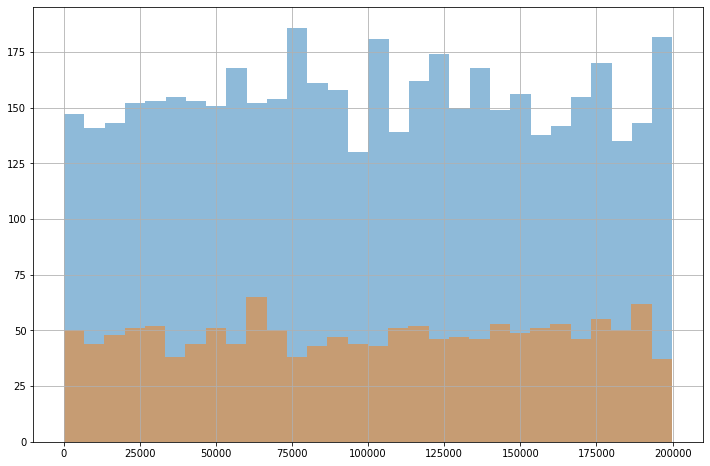

In [34]:
client_1 = data[(data['churn']==0)]['estimated_salary']
client_2 = data[(data['churn']==1)]['estimated_salary']
client_1.hist(bins = 30, alpha=0.5)
client_2.hist(bins = 30, alpha=0.5)

<AxesSubplot:>

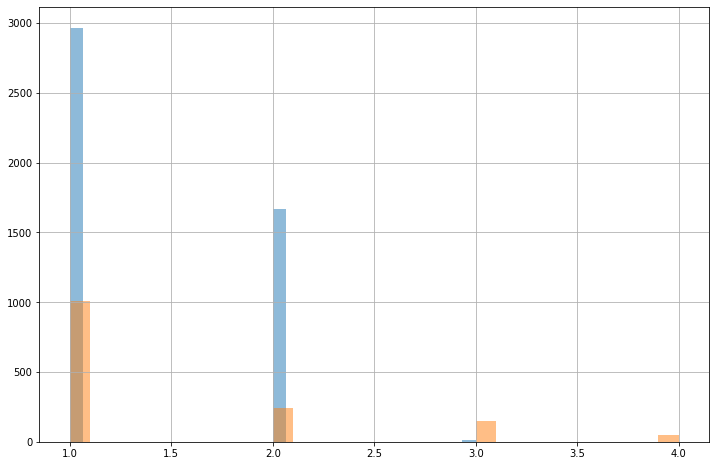

In [35]:
product_1 = data[(data['churn']==0)]['products']
product_2 = data[(data['churn']==1)]['products']
product_1.hist(bins = 30, alpha=0.5)
product_2.hist(bins = 30, alpha=0.5)

Выборки достаточно независимы друг от друга, используем ttest для проверки гипотез 1 и 2. Для проверки гипотезы 3 используем z-test.

Сформулируем и проверим статистические гипотезы:

### Гипотеза 1: доходы ушедших и оставшихся клиентов

H₀:средние доходы ушедших и оставшихся клиентов равны

H₁:средние доходы ушедших и оставшихся клиентов не равны

In [36]:
results = st.ttest_ind (
    data[data['churn']==0]['estimated_salary'],
    data[data['churn']==1]['estimated_salary'], equal_var = False)

alpha = 0.05

print (results.pvalue) 

if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

0.7859743578106887
Не получилось отвергнуть нулевую гипотезу


Отвергнуть нулевую гипотезу не получилось: средние доходы ушедших и оставшихся клиентов равны.

### Гипотеза 2: количество используемых банковских продуктов оставшихся и ушедших клиентов

H₀:среднее количество используемых банковских продуктов ушедших и оставшихся клиентов равно

H₁:среднее количество используемых банковских продуктов ушедших и оставшихся клиентов не равно

In [37]:
results = st.ttest_ind (
    data[data['churn']==0]['products'],
    data[data['churn']==1]['products'], equal_var = False)

alpha = 0.05

print (results.pvalue) 

if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

2.7818147936864007e-06
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу: среднее количество используемых банковских продуктов ушедших и оставшихся клиентов не равно.

### Гипотеза 3: доля кредитных карт оставшихся и ушедших клиентов

H₀:доли кредитных карт ушедших и оставшихся клиентов равны

H₁:доли кредитных карт ушедших и оставшихся клиентов не равны

Для проверки равенства долей используем z-test:

In [38]:
def test_share_eq(dep_col, ind_col, ALPHA):

    group_size = data[ind_col].value_counts() #размер групп
    share_size = data.groupby(ind_col)[dep_col].sum() #размер целевых подгрупп в группах
   
    
    p = share_size / group_size #доли
    p_combined = share_size.sum() / group_size.sum() #общая доля
    # разница пропорций в датасетах
    difference = p[0] - p[1]
    
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/group_size[0] + 1/group_size[1]))

    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1) 

    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print(f'Уровень значимости: {ALPHA}')
    print('p-значение: {0:.15f}'.format(p_value))

    if (p_value < ALPHA):
        print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
    else:
        print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными")

test_share_eq('churn', 'creditcard', .05)

Уровень значимости: 0.05
p-значение: 0.937626081249877
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Отвергнуть нулевую гипотезу не получилось: доли кредитных карт ушедших и оставшихся клиентов равны.

## Выводы и рекомендации:

### Выводы:
Наиболее склонны к уходу клиенты с рейтингом ниже 410, женского пола из города Ростов Великий. Такие клиенты в основном не имеют собственности объектов вовсе, либо имеют их 7. Возрастная категория составляет 49-62 года. Клиенты имеют 3-4 продукта банка и не проявляют активности.

При проверке гипотез мы выяснили, что средние доходы ушедших и оставшихся клиентов равны, доля кредитных карт ушедших и оставшихся клиентов равна, среднее количество используемых банковских продуктов ушедших и оставшихся клиентов не равно.

### Рекомендации:
Необходимо более детально рассмотреть филиалы в городе Ростов Великий. Для клиентов с кредитным рейтингом ниже 410 необходимо разработать подходящий продукт. Предложить для возрастных категорий 49-62 более подходящую пенсионную програму. Детально разобраться с негативным опытом использования более 3х банковских продуктов, возможна нехватка информирования клиентов о продуктах, либо наоборот излишняя навязчивость в предложении услуг. Для неакиивных клиентов возможно дополнительное информирование о продуктах банка. Возможно дополнительные продукты для женщин препринимателей.